In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(30,15)},font_scale=1.5)

monomarental = pd.read_csv('monomarental.csv')

monomarental.sample(3)

,sexo,edad,ascendencia,estado_laboral,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof,hijos
2909,Mujer,57.0,Blanca,Ocupados,34000.0,No,Actividades de la administración pública en ge...,Sí,No asistió,"Sí, asistió","Sí, asistió",No asistió,No asistió,No asistió,0.0,No asistió,0
5713,Mujer,68.0,Blanca,Inactivo: jubilado,0.0,0.0,.,Sí,No asistió,"Sí, asistió",No asistió,No asistió,0.0,0.0,0.0,0.0,1
16941,Mujer,85.0,Blanca,Inactivo: jubilado,0.0,0.0,.,Sí,No asistió,"Sí, asistió",No asistió,No asistió,0.0,0.0,0.0,0.0,3


In [2]:
monomarental['busca_otro_trabajo'] = monomarental['busca_otro_trabajo'].astype('str')

monomarental = monomarental[~monomarental['busca_otro_trabajo'].str.contains('0.0')]

In [3]:
for i in list(monomarental.columns):
    if monomarental[i].dtype == 'object':
        monomarental[i] = monomarental[i].astype("category").cat.codes

monomarental.sample(3)

,sexo,edad,ascendencia,estado_laboral,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof,hijos
13481,0,34.0,3,0,11000.0,0,34,1,2,2,3,2,0,0,0,0,2
5099,0,43.0,3,0,58000.0,0,27,1,2,2,3,3,0,0,0,0,2
1538,0,37.0,3,0,50000.0,0,246,1,2,2,3,3,2,2,0,3,2


In [4]:
monomarental.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sexo,10877.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
edad,10877.0,45.564310,12.463866,17.0,36.0,45.0,55.0,98.0
ascendencia,10877.0,2.930312,0.465347,0.0,3.0,3.0,3.0,5.0
estado_laboral,10877.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
sueldo,10877.0,20539.950630,22696.809854,0.0,0.0,17000.0,30000.0,396000.0
busca_otro_trabajo,10877.0,0.164567,0.370807,0.0,0.0,0.0,0.0,1.0
actividad,10877.0,119.999724,90.537225,0.0,34.0,102.0,209.0,303.0
asistencia alguna vez a enseñanza,10877.0,0.998437,0.039505,0.0,1.0,1.0,1.0,1.0
edu preescolar,10877.0,1.645215,0.481726,0.0,1.0,2.0,2.0,2.0
edu primaria,10877.0,1.996690,0.080158,0.0,2.0,2.0,2.0,2.0


<AxesSubplot:>

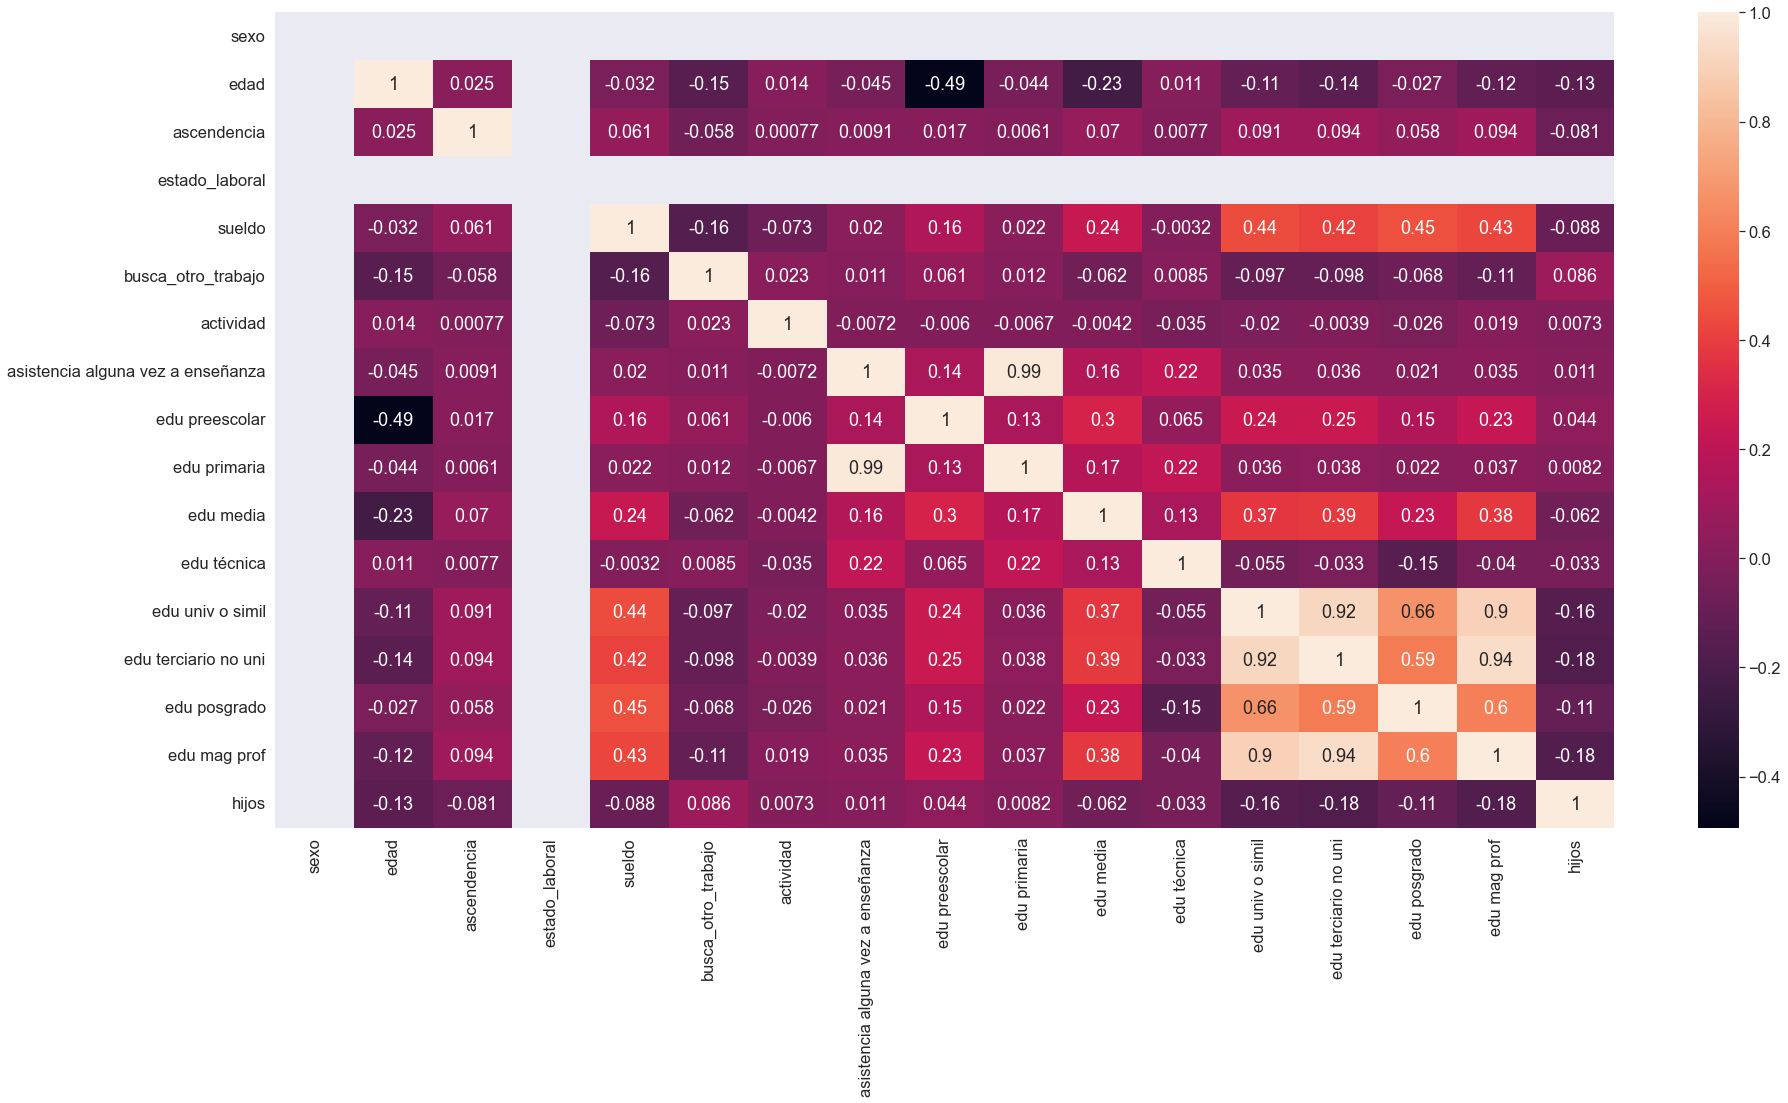

In [5]:
corr = monomarental.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In [6]:
# Feautures
X = monomarental['actividad'].to_numpy().reshape(-1,1)
y = monomarental['busca_otro_trabajo'].to_numpy()

print('X shape', X.shape, '\nY shape', y.shape)

X shape (10877, 1) 
Y shape (10877,)


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

log_reg.score(X, y)

0.8354325641261378

In [9]:
prediction = np.array([100, 20, 200, 320, 10]).reshape(-1,1)
log_reg.predict(prediction)

array([0, 0, 0, 0, 0], dtype=int8)

In [10]:
from sklearn.metrics import accuracy_score

y_train_pred = log_reg.predict(x_train) #Prediccion en Train
y_test_pred = log_reg.predict(x_test) #Prediccion en Test

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8362142944710065
% de aciertos sobre el set de evaluación: 0.8330882352941177


In [11]:
probabilidades_prediccion = log_reg.predict_proba(prediction)
probabilidades_prediccion[:,1]

array([0.16118596, 0.15203987, 0.17323739, 0.18862582, 0.15092707])